In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng
import math
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
from scipy.optimize import curve_fit
from statsmodels.tsa.api import Holt

In [2]:
df_108 = pd.read_csv('108.csv', encoding = 'utf-8')
df_109 = pd.read_csv('109.csv', encoding = 'utf-8')
df_110 = pd.read_csv('110.csv', encoding = 'utf-8')

# df_110.head()

In [3]:
water_108 = pd.DataFrame({'date': df_108['日期'], 'inflow': df_108['水庫進流量/立方公尺']})
for i in range(365):
    water_108['inflow'][i] = int(water_108['inflow'][i].replace(",",""))
    water_108['date'][i] = '108-' + water_108['date'][i].replace("月","-").replace('日','')
water_108

,date,inflow
0,108-1-1,7543380
1,108-1-2,6572620
2,108-1-3,7019088
3,108-1-4,7374848
4,108-1-5,4338772
...,...,...
360,108-12-27,855940
361,108-12-28,700700
362,108-12-29,832740
363,108-12-30,1129728


In [4]:
water_109 = pd.DataFrame({'date': df_109['日期'], 'inflow': df_109['水庫進流量/立方公尺']})
water_109 = water_109[:-1]
for i in range(365):
    water_109['inflow'][i] = int(water_109['inflow'][i].replace(",",""))
    water_109['date'][i] = '109-' + water_109['date'][i].replace("月","-").replace('日','')
water_109

,date,inflow
0,109-1-1,2416420
1,109-1-2,1718880
2,109-1-3,1391012
3,109-1-4,1002260
4,109-1-5,1018292
...,...,...
360,109-12-26,3507660
361,109-12-27,2568852
362,109-12-28,1949832
363,109-12-29,1730160


In [5]:
water_110 = pd.DataFrame({'date': df_110['日期'], 'inflow': df_110['水庫進流量/立方公尺']})
for i in range(365):
    water_110['inflow'][i] = int(water_110['inflow'][i].replace(",",""))
    water_110['date'][i] = '110-' + water_110['date'][i].replace("月","-").replace('日','')
water_110

,date,inflow
0,110-1-1,1109556
1,110-1-2,974520
2,110-1-3,817460
3,110-1-4,1168992
4,110-1-5,2306772
...,...,...
360,110-12-27,4729660
361,110-12-28,3473152
362,110-12-29,2310048
363,110-12-30,1857808


In [6]:
all_water = water_108.append(water_109).append(water_110).reset_index()
all_water.drop(['index'], axis = 1, inplace = True)
# t = range(0, len(all_water))
# all_water['t'] = t
all_water['inflow'] = all_water['inflow'].astype(int)

all_water

,date,inflow
0,108-1-1,7543380
1,108-1-2,6572620
2,108-1-3,7019088
3,108-1-4,7374848
4,108-1-5,4338772
...,...,...
1090,110-12-27,4729660
1091,110-12-28,3473152
1092,110-12-29,2310048
1093,110-12-30,1857808


In [7]:
all_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1095 non-null   object
 1   inflow  1095 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 13.0+ KB


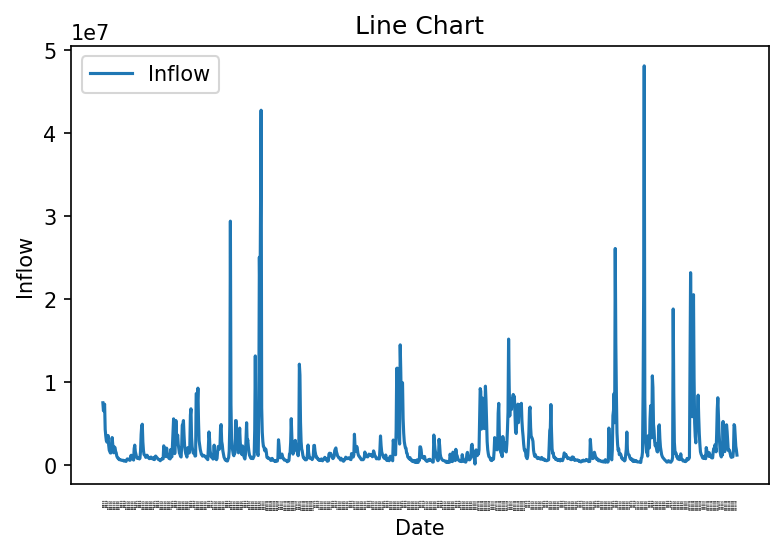

In [8]:
date  = all_water['date']
y =  all_water['inflow']

plt.plot(date, y, label="Inflow")
plt.xticks(date, rotation="vertical", fontsize=10)
plt.tick_params(
    labelsize = 1,
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)         # ticks along the top edge are off

plt.subplots_adjust(bottom=0.15)
plt.xlabel("Date")
plt.ylabel("Inflow")
plt.title("Line Chart")
plt.legend()
plt.show()

In [9]:
def SI_LR(y_v, n):
    y_data = y_v
    X_data_ar = np.arange(1, len(y_v)+1)
    X_data_T = X_data_ar.T
    X_data = pd.DataFrame(X_data_T,columns = ['Time'])
    X_data = sm.add_constant(X_data)
    olsmod = sm.OLS(y_data, X_data)
    result_reg = olsmod.fit()
    st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
    y_v_LR_a = data[:, 2]
    SI_LR_a = y_v / y_v_LR_a
    SI_id_s = np.arange(1,len(y_v)+1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_LR_a_df = pd.DataFrame({'SILR': SI_LR_a, 'SIid': SI_id})
    SI_LR_u = np.zeros(n)
    for j in range(1,n+1):
        SI_LR_u[j-1] = SI_LR_a_df['SILR'][SI_LR_a_df['SIid'] == j].dropna().mean()
    SI_LR = SI_LR_u / sum(SI_LR_u) * n
#     print('Seasonal Index:', SI_LR)
#     print('\n')
    y_v_SI_LR = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0,len(y_v)):
        Idd = int(SI_LR_a_df['SIid'][k] - 1)
        y_v_SI_LR[k] = SI_LR[Idd]
        DSI_y_v[k] = y_v[k] / SI_LR[Idd]
#     print('Deseasonalized Data:', DSI_y_v)
    SI_LR_result_a = np.array([SI_LR_a_df['SIid'], y_v_SI_LR, y_v, DSI_y_v])
    SI_LR_result_df = pd.DataFrame(SI_LR_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des_D'])
    return {"LR_ind":SI_LR, "SI_LR_res":SI_LR_result_df}

,SID,SeaIdx,orig,Des_D
0,1.0,1.871433,7543380.0,4.030803e+06
1,2.0,1.570457,6572620.0,4.185165e+06
2,3.0,1.575303,7019088.0,4.455707e+06
3,4.0,1.626255,7374848.0,4.534867e+06
4,5.0,1.251882,4338772.0,3.465800e+06
...,...,...,...,...
1090,361.0,1.237018,4729660.0,3.823438e+06
1091,362.0,0.918505,3473152.0,3.781312e+06
1092,363.0,0.702459,2310048.0,3.288515e+06
1093,364.0,0.659951,1857808.0,2.815071e+06


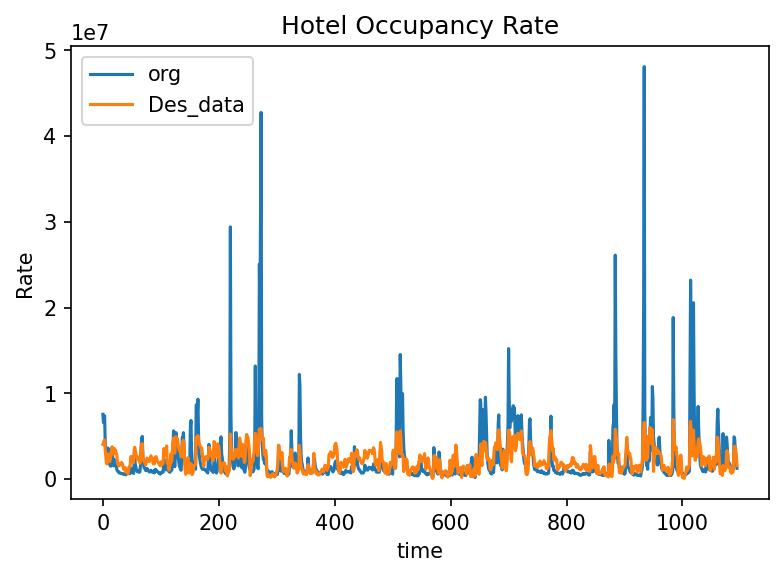

In [10]:
allwater_SILR = pd.DataFrame(columns=["LR_ind", "SI_LR_res"])
allwater_SILR = SI_LR(all_water['inflow'], 365)
allwater_LR_Idx = allwater_SILR["LR_ind"]
# print(ch20_ts3_LR_Idx)
allwater_LR_Result = allwater_SILR["SI_LR_res"]
display(allwater_LR_Result)
t_r = np.arange(0, len(all_water['inflow']), 1)
plt.plot(t_r, allwater_LR_Result['orig'])
plt.plot(t_r, allwater_LR_Result['Des_D'])
plt.legend(labels=['org', 'Des_data'])
plt.xlabel('time')
plt.ylabel('Rate')
plt.title('Hotel Occupancy Rate')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Des_D   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.510
Date:                Thu, 19 May 2022   Prob (F-statistic):             0.0339
Time:                        20:29:55   Log-Likelihood:                -16979.
No. Observations:                1095   AIC:                         3.396e+04
Df Residuals:                    1093   BIC:                         3.397e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.36e+06   7.93e+04     29.743      0.0

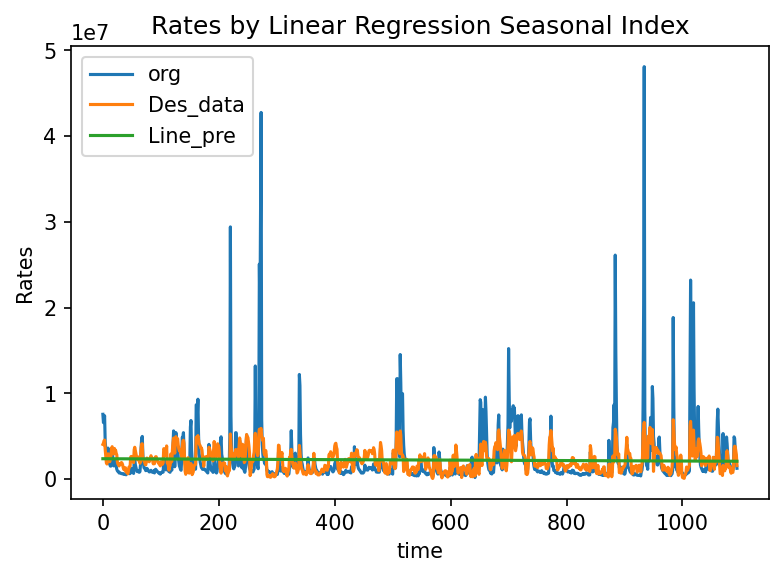

In [11]:
y_data_allwater_LR = allwater_LR_Result['Des_D']
X_data_ar_allwater = np.array(t_r)
X_data_ar_allwater_T = X_data_ar_allwater.T
X_data_allwater = pd.DataFrame(X_data_ar_allwater_T, columns = ['t'])
X_data_allwater = sm.add_constant(X_data_allwater)
olsmod_allwater_LR = sm.OLS(y_data_allwater_LR, X_data_allwater)
result_reg_allwater_LR = olsmod_allwater_LR.fit()
print(result_reg_allwater_LR.summary())
allwater_LR_st_1, allwater_LR_data_1, allwater_LR_ss2_1 = sso.summary_table(result_reg_allwater_LR, alpha=0.05)
allwater_LR_y_pre_1 = allwater_LR_data_1[:, 2]
allwater_LR_SD_1 = allwater_LR_data_1[:, 10]
des_pre_allwater_LR = allwater_LR_y_pre_1
print(des_pre_allwater_LR)
plt.plot(t_r, allwater_LR_Result['orig'])
plt.plot(t_r, allwater_LR_Result['Des_D'])
plt.plot(t_r, des_pre_allwater_LR)
plt.legend(labels=['org', 'Des_data', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Rates')
plt.title('Rates by Linear Regression Seasonal Index')
plt.show()

In [14]:
# studentized residual
st1, data1, ss3 = sso.summary_table(result_reg_allwater_LR, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
print(SD)
print('mu = ', mu)
print('sigma = ', sigma)

[ 1.27463771  1.39256876  1.59911155 ...  0.93058727  0.56969095
 -0.38975474]
mu =  4.2708463779499964e-05
sigma =  0.9999946659797125


H0: Errors are normally distributed.  
H1: Errors are not normally distributed.

In [15]:
print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro Test
Statistics=0.949, p=0.000


H0: Homoscedasticity  
H1: Heteroscedasticity

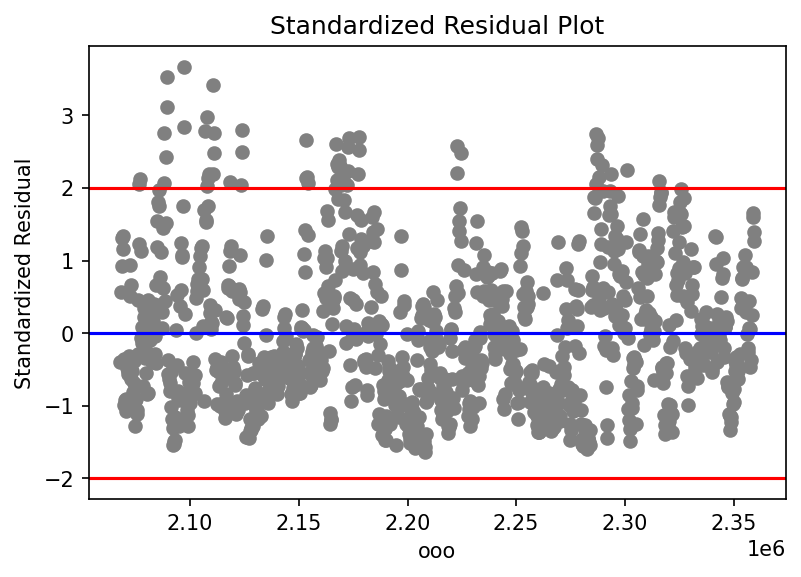

In [16]:
y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('ooo')
plt.ylabel('Standardized Residual')
plt.show()

H0 : Randomness exists.  
H1 : Randomness does not exist.

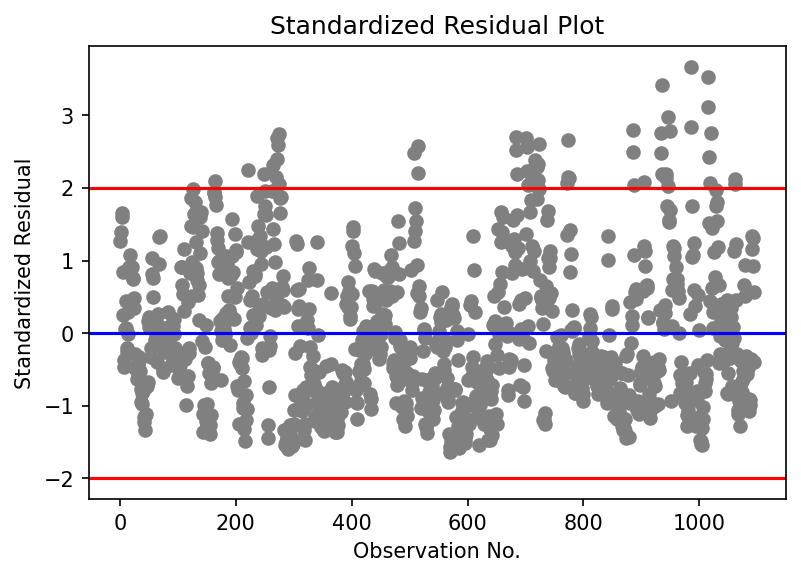

In [17]:
Id1 = data1[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

In [18]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(len(l)): 
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [19]:
import math
import statistics

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
  
print('p_value for Z-statistic= ', Z_pval)

runs =  145
n1 =  549
n2 =  547
runs_exp =  548.9981751824818
stan_dev =  16.54533006243818
z =  -24.417655837501446
pval_z =  1.1106226534461274e-131
p_value for Z-statistic=  1.1106226534461274e-131


H0: The data are not positively first-order correlated  
H1: The data are positively first-order correlated

In [20]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

In [21]:
d_w_3 = Durbin_Watson_test(SD)
print(d_w_3)

x_square_sum =  1094.9883205240192
size =  1095
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.          0.11793104  0.20654279 ... -0.37565253 -0.36089632
 -0.95944569]
d =  0.3111379338674694
0.3111379338674694


For n = 1100, k = 1, dL = 1.899, dU　= 1.903.  

First order correlation exist!!

New Des Prediction [2067615.06144316 2067348.37879978 2067081.6961564  2066815.01351302
 2066548.33086963 2066281.64822625 2066014.96558287 2065748.28293949
 2065481.60029611 2065214.91765273 2064948.23500935 2064681.55236597
 2064414.86972259 2064148.18707921 2063881.50443583 2063614.82179245
 2063348.13914907 2063081.45650569 2062814.77386231 2062548.09121893
 2062281.40857555 2062014.72593217 2061748.04328879 2061481.36064541
 2061214.67800203 2060947.99535865 2060681.31271527 2060414.63007189
 2060147.94742851 2059881.26478513 2059614.58214175 2059347.89949837
 2059081.21685498 2058814.5342116  2058547.85156822 2058281.16892484
 2058014.48628146 2057747.80363808 2057481.1209947  2057214.43835132
 2056947.75570794 2056681.07306456 2056414.39042118 2056147.7077778
 2055881.02513442 2055614.34249104 2055347.65984766 2055080.97720428
 2054814.2945609  2054547.61191752 2054280.92927414 2054014.24663076
 2053747.56398738 2053480.881344   2053214.19870062 2052947.51605724
 2052680.8334138

,time,org,Des_data,Line_pre,Seasonal Pre
0,0.0,7543380.0,4.030803e+06,2.359633e+06,4.415895e+06
1,1.0,6572620.0,4.185165e+06,2.359366e+06,3.705282e+06
2,2.0,7019088.0,4.455707e+06,2.359099e+06,3.716296e+06
3,3.0,7374848.0,4.534867e+06,2.358833e+06,3.836062e+06
4,4.0,4338772.0,3.465800e+06,2.358566e+06,2.952646e+06
...,...,...,...,...,...
1455,1455.0,NaN,NaN,1.971609e+06,2.438915e+06
1456,1456.0,NaN,NaN,1.971343e+06,1.810687e+06
1457,1457.0,NaN,NaN,1.971076e+06,1.384601e+06
1458,1458.0,NaN,NaN,1.970809e+06,1.300637e+06


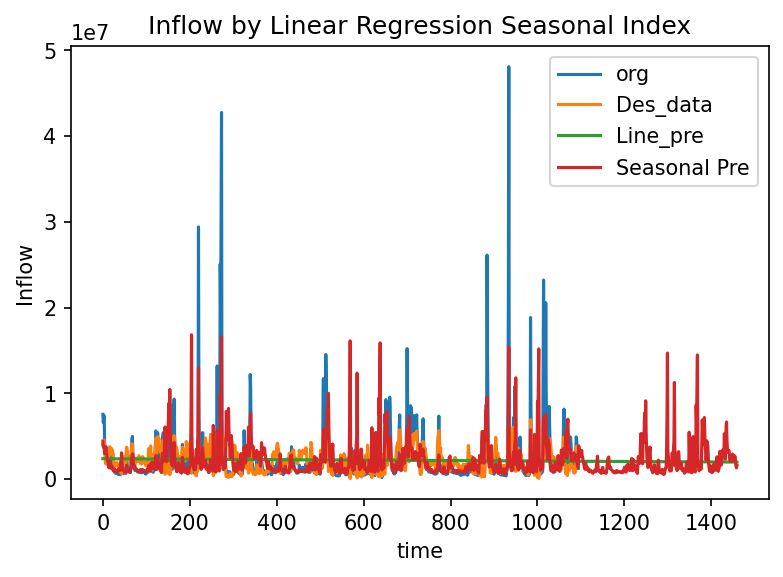

In [22]:
Sea_pre_allwater_LR = des_pre_allwater_LR * allwater_LR_Result['SeaIdx']
New_t_1 = np.array(list(range(1095, 1095+365)))
Total_t_1 = np.append(t_r, New_t_1)
New_t_1 = sm.add_constant(New_t_1)
allwater_LR_des_pre_New_t_1 = result_reg_allwater_LR.predict(New_t_1)
print('New Des Prediction', allwater_LR_des_pre_New_t_1)
allwater_LR_Sea_pre_New_t_1 = allwater_LR_des_pre_New_t_1 * allwater_LR_Idx
print('New Seasonal Prediction', allwater_LR_Sea_pre_New_t_1)
New_Nan = np.zeros(New_t_1.shape[0])
New_Nan[:] = np.nan
allwater_LR_New_orig_1 = np.append(allwater_LR_Result['orig'], New_Nan)
allwater_LR_New_Des_D_1 = np.append(allwater_LR_Result['Des_D'], New_Nan)
allwater_LR_New_des_pre_1 = np.append(des_pre_allwater_LR, allwater_LR_des_pre_New_t_1)
allwater_LR_New_Sea_pre_1 = np.append(Sea_pre_allwater_LR, allwater_LR_Sea_pre_New_t_1)
allwater_LR_S_a = np.array([Total_t_1, allwater_LR_New_orig_1, allwater_LR_New_Des_D_1, allwater_LR_New_des_pre_1, allwater_LR_New_Sea_pre_1])
allwater_LR_S_df = pd.DataFrame(allwater_LR_S_a.T, columns=['time', 'org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
display(allwater_LR_S_df)
plt.plot(Total_t_1, allwater_LR_New_orig_1)
plt.plot(Total_t_1, allwater_LR_New_Des_D_1)
plt.plot(Total_t_1, allwater_LR_New_des_pre_1)
plt.plot(Total_t_1, allwater_LR_New_Sea_pre_1)
plt.legend(labels=['org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow by Linear Regression Seasonal Index')
plt.show()

In [23]:
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE

In [25]:
# print('Error Metrics for Seasonal Index by Moving Average')
# ch20_ts3_MA_Err_M = ErrMetrix(df20_3['Rate'], Sea_pre_ch20_ts3_MA)
# print('\n')
print('Error Metrics for Seasonal Index by LR')
ch20_ts3_LR_Err_M = ErrMetrix(all_water['inflow'], Sea_pre_allwater_LR)
# print('\n')
# print('Error Metrics for LR Dummy')
# ch20_ts3d_DM_Err_M = ErrMetrix(df20_3['Rate'], des_pre_df20_3d_DM)
# ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
# ch20_ts3_ErrM_a = np.array([ErrM_id, ch20_ts3_MA_Err_M, ch20_ts3_LR_Err_M, ch20_ts3d_DM_Err_M])
# ch20_ts3_ErrM_df = pd.DataFrame(ch20_ts3_ErrM_a.T, columns = ['ErrM', 'SIMA', 'SILR', 'Dummy'])
# print('dataset:')
# display(ch20_ts3_ErrM_df)

Error Metrics for Seasonal Index by LR
MAD =  1384335.280174
MSE =  7892040429938.033
RMSE =  2809277.563705
MAPE =  95.075719 %
